# Business Understanding
De organisatie wilt graag inzicht verkrijgen in hun werknemersverloop (attrition). Gezien de scope van de opdracht is het lastig om de motivatie van de organisatie te begrijpen. Er wordt een aanname gedaan dat de organisatie kampt met hoge (on)kosten door het werknemersverloop en zij willen graag preventief kunnen handelen om werknemers te behouden. Ze vragen zich af of de kosten lager kunnen zijn door te investeren op werknemersretentie in plaats van te besteden aan recruitment. De organisatie heeft nog geen oplossing naast het werven van nieuwe werknemers.

Er zijn meerdere databronnen beschikbaar gesteld in de vorm van CSV-bestanden. De variabelen uit deze bestanden zullen worden geanalyseerd, waaruit een aantal relevante variabelen geselecteerd worden voor een voorspellend model. Voor de scope en richting van het onderzoek zijn onderstaand een tweetal doelstellingen beschreven.

### Probleemstelling
* Hoe kan de organisatie werknemersverloop verminderen?
* Welke variabelen correleren met het verloop?

### Doelstelling
* Inzicht krijgen in welke variabelen een relatie vormen die werknemersverloop beïnvloeden
* Een model bouwen om werknemersverloop te voorspellen


### Vraagstelling
* Welke variabelen hebben het meeste invloed op het werknemersverloop?
* Kunnen clusters/groepen werknemers geïdentificeerd worden met een verhoofd risico voor verloop?

### Succescriteria
* De organisatie preventief kan handelen om werknemersverloop te minderen en werknemersretentie te realiseren
* Kosten verlaagd kunnen worden, die veroorzaakt worden door werknemersverloop

# Data Understanding
De aangeleverde data komen uit twee verschillende bronnen; vanuit HR (bestaand) en enquêtes (additioneel). Tevens is een data dictionary meegeleverd, zodat uniforme definities gehanteerd worden. Onderstaand een beknopte opsomming van de data.

* Standaard HR-data waarin belangrijke werknemers data (anoniem) staat
* Tweemaal enquête data; één vanuit de werknemers en één vanuit de managers
* Kloktijden met de start en eind timestamps van de shifts

## Definities van de variabelen

| Variabel                 | Omschrijving                                       | Niveau |
| ------------------------ | -------------------------------------------------- | ------ |
| Age                      | Leeftijd werknemer                                 |        |
| Attrition                | De werknemer is vorig jaar weggegaan               |        |
| BusinessTravel           | Frequentie van zakelijke reizen afgelopen jaar     |        |
| Department               | Afdeling binnen het bedrijf                        |        |
| DistanceFromHome         | Afstand vanaf huis in kilometers (km's)            |        |
| Education                | Educatie niveau                                    | 1. Below college <br> 2. College <br> 3. Bachelor <br> 4. Master <br> 5. Doctor |
| EducationField           | Educatie vakgebied                                 |        |
| EmployeeCount            | Aantal werknemers                                  |        |
| EmployeeNumber           | Unieke werknemersnummer (ID)                       |        |
| EnvironmentSatisfaction  | Tevredenheidsniveau van de werkomgeving            | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| Gender                   | Geslacht                                           |        |
| JobInvolvement           | Niveau van aansluiting tussen werknemer en functie | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| JobLevel                 | Niveau van functie binnen de organisatie           |        |
| JobRole                  | Naam functie                                       |        |
| JobSatisfaction          | Tevredenheidsniveau over werk                      | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| MaritalStatus            | Burgelijke staat                                   |        |
| MonthlyIncome            | Maandelijk inkomen in roepies (valuta India)       |        |
| NumCompaniesWorked       | Totaal aantal werkgevers van werknemer             |        |
| Over18                   | Of de werknemer boven de 18 is of niet             |        |
| PercentSalaryHike        | Procentuele salarisverhoging afgelopen jaar        |        |
| PerformanceRating        | Resultaatbeoordeling afgelopen jaar                | 1. Low <br> 2. Good <br> 3. Excellent <br> 4. Outstanding |
| RelationshipSatisfaction | Tevredenheidsniveau van relatie                    | 1. Low <br> 2. Medium <br> 3. High <br> 4. Very High |
| StandardHours            | Standaard werkuren van werknemer                   |        |
| StockOptionLevel         | Aandelenniveau van werknemer                       |        |
| TotalWorkingYears        | Totaal aantal werkjaren van werknemer              |        |
| TrainingTimesLastYear    | Aantal training voor werknemer afgelopen jaar      |        |
| WorkLifeBalance          | Niveau van werk/privé balans                       | 1. Bad <br> 2. Good <br> 3. Better <br> 4. Best |
| YearsAtCompany           | Totaal aantal werkjaren bij de organisatie         |        |
| YearsSinceLastPromotion  | Aantal jaren sinds laatste promotie                |        |
| YearsWithCurrentManager  | Aantal jaar onder huidige manager                  |        |

In [493]:
# Importeren van de benodigde libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## Data beschikbaar stellen

In [494]:
# Data inlezen
employee_survey_data = pd.read_csv('employee_survey_data.csv')
general_data = pd.read_csv('general_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
in_time = pd.read_csv('in_time.csv')
out_time = pd.read_csv('out_time.csv')

# Data samenvoegen
data = pd.merge(
    general_data,
    employee_survey_data,
    on='EmployeeID'
    )

data = pd.merge(
    data,
    manager_survey_data,
    on='EmployeeID'
    )

## Data verkennen

In [495]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


> De eerste 10 rijen van de dataframe

In [496]:
data.shape

(4410, 29)

> Omvang van de dataframe; 29 kolommen en 4410 rijen

In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

> Hoeveelheid non-null waarden en de dtypes van de dataframe

In [498]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


> Beschrijvende statistiek van de dataframe

In [499]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

> Er missen waarden in vijf kolommen van de dataframe: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction en JobInvolvement (data is vrij compleet)

> RelationshipSatisfaction bestaat niet, staat wel in de data_dictionary

In [500]:
data.duplicated().sum()

0

> Geen redundante data in de dataframe

### in_time

In [501]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


>De eerste vijf rijen van in_time

In [502]:
in_time.shape

(4410, 262)

>Omvang van in_time; 262 kolommen en 4410 rijen

In [503]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


>Data types van in_time

In [504]:
in_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

>Missende waarden in in_time; wellicht verlof en verzuim ook?

In [505]:
in_time.duplicated().sum()

0

>Geen redundante data in in_time

### out_time

In [506]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


>De eerste vijf rijen van out_time

In [507]:
out_time.shape

(4410, 262)

>Omvang van out_time; 262 kolommen en 4410 rijen

In [508]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


>Data types van out_time

In [509]:
out_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

>Missende waarden in out_time; wellicht ook verlof en verzuim?

In [510]:
out_time.duplicated().sum()

0

>Geen redundante data in out_time

# Data Preparation

Kijken met wat voor soort categorische data we te maken hebben en welke overwegingen genomen moeten worden. Eerst worden de unieke waarden uit de kolommen per dataset gehaald en onderverdeeld in de nominale en ordinale categorieën. Daarna zal middels explorerende data-analyse (EDA) de relaties en patronen op het eerste gezicht gevisualiseerd worden. Tevens moet ook besloten worden wat met missende waarden gedaan worden; verwijderen of imputeren.

## Belangrijke overwegingen

1. De kloktijddata bevatten de unieke werknemers-ID in naamloze kolom; omzetten naar EmployeeID voor eventuele integratie
2. Kloktijden omzetten naar datetime-objecten voor analyse
3. Andere data omzetten naar andere data types om memory usage te verlagen, performance te verhogen en analyses voor te bereiden
4. Missende waarden verwijderen of imputeren

## Missende waarden imputeren

In [511]:
# Gemiddelde waarden invullen
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].mean(), inplace=True)

# Meest voorkomende waarden invullen
data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].mode()[0], inplace=True)
data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0], inplace=True)
data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mode()[0], inplace=True)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\3590491689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\3590491689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

## Unieke waarden van categorische data

### dataframe

In [512]:
# Selecteer alle kolommen met object data type
for column in data.select_dtypes(include='object').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No' 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
Unique values: ['Sales' 'Research & Development' 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Unique values: ['Female' 'Male']

Column: JobRole
Unique values: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

Column: MaritalStatus
Unique values: ['Married' 'Single' 'Divorced']

Column: Over18
Unique values: ['Y']



### Zijn er werknemers onder de 18?

In [513]:
# Aantal werknemers boven de 18
over18_counts = data['Over18'].value_counts()

# Totaal aantal rijen in de dataset
total_rows = len(data)

# Loop door de unieke waarden en aantallen
for value, count in over18_counts.items():
    
    # Bereken het percentage
    percentage = (count / total_rows) * 100
    
    # Print de waarden, aantal en percentage
    print(f"Value: {value}, Count: {count}, Percentage: {percentage}%")

Value: Y, Count: 4410, Percentage: 100.0%


> Nee, dus deze feature is irrelevant, want iedereen is boven de 18

### dataframe subsetten zonder kolom Over18

In [514]:
# Verwijder de kolom Over18
data_subset = data.drop("Over18", axis=1)

# Selecteer alle kolommen met object data type
for column in data_subset.select_dtypes(include='object').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data_subset[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No' 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
Unique values: ['Sales' 'Research & Development' 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Unique values: ['Female' 'Male']

Column: JobRole
Unique values: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

Column: MaritalStatus
Unique values: ['Married' 'Single' 'Divorced']



### Floats omzetten naar ints

In [515]:
# List met kolommen van float data
data_floats = [column for column in data.columns if data[column].dtype == 'float64']

# Print de unieke waarden van de float data
for column in data_subset[data_floats].columns:
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\n{data_subset[column].unique()}\n")

Column: NumCompaniesWorked
[1.         0.         3.         4.         2.         7.
 9.         5.         6.         8.         2.69483033]

Column: TotalWorkingYears
[ 1.          6.          5.         13.          9.         28.
 10.         21.         16.         37.          7.          3.
 15.          8.         11.27993638 12.         17.         19.
 22.          2.          4.         23.          0.         11.
 24.         25.         20.         14.         26.         18.
 30.         36.         31.         33.         32.         34.
 40.         29.         35.         27.         38.        ]

Column: EnvironmentSatisfaction
[3. 2. 4. 1.]

Column: JobSatisfaction
[4. 2. 1. 3.]

Column: WorkLifeBalance
[2. 4. 1. 3.]



In [516]:
# Float data naar integer data
data_subset[data_floats] = data_subset[data_floats].round().astype('Int64')

# Resultaat
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   EmployeeCount            4410 non-null   int64 
 8   EmployeeID               4410 non-null   int64 
 9   Gender                   4410 non-null   object
 10  JobLevel                 4410 non-null   int64 
 11  JobRole                  4410 non-null   object
 12  MaritalStatus            4410 non-null   object
 13  MonthlyIncome            4410 non-null   int64 
 14  NumCompaniesWorked       4410 non-null  

### Kopieren van dataset voor nummeriek en category

In [517]:
# Kopie van de dataset
data_subset_cat = data_subset.copy()
data_subset_num = data_subset.copy()

### Kolommen met object dtype omzetten naar category voor nominale data

In [518]:
# Selecteer alle kolommen met dtype object
object_columns = data_subset_cat.select_dtypes(include='object').columns

# Omzetten naar dtype category
data_subset_cat[object_columns] = data_subset_cat[object_columns].astype('category')

# Selecteer alle kolommen met category dtype
for column in data_subset_cat.select_dtypes(include='category').columns:
    
    # Selecteer alle unieke waarden van de kolom
    unique_values = data_subset_cat[column].unique()
    
    # Print de kolomnaam en unieke waarden
    print(f"Column: {column}\nUnique values: {unique_values}\n")

Column: Attrition
Unique values: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']

Column: Gender
Unique values: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Column: JobRole
Unique values: ['Healthcare Representative', 'Research Scientist', 'Sales Executive', 'Human Resources', 'Research Director', 'Laboratory Technician', 'Manufacturing Director', 'Sales Representative', 'Manager']
Categories (

### Mapping voor nummeriek converteren naar string/category

In [519]:
# Ordinale kolommen selecteren; deze kolommen hebben een logische volgorde
ordinal_mapping = {
    "Education": {
        1: "Below College",
        2: "College",
        3: "Bachelor",
        4: "Master",
        5: "Doctor"
        },
    "EnvironmentSatisfaction": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "JobInvolvement": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "JobLevel": {
        1: "Entry",
        2: "Mid",
        3: "Senior",
        4: "Manager",
        5: "Director"
        },
    "JobSatisfaction": {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"
        },
    "PerformanceRating": {
        1: "Low",
        2: "Good",
        3: "Excellent",
        4: "Outstanding"
        },
    "StockOptionLevel": {
        0: "Low",
        1: "Medium",
        2: "High",
        3: "Very High"
        },
    "WorkLifeBalance": {
        1: "Bad",
        2: "Good",
        3: "Better",
        4: "Best"
        }
    }

### Ordinale data kolommen omzetten naar dtype object voor remappen

In [520]:
# Dictionary keys gebruiken om de kolommen te selecteren
for column in ordinal_mapping.keys():
    
    # Controleer of de kolom bestaat in de DataFrame
    if column in data_subset_cat.columns:
        
        # Omzetten naar het datatype 'object'
        data_subset_cat[column] = data_subset_cat[column].astype('object')

# Controleer de resultaten
print(data_subset_cat.dtypes[data_subset_cat.dtypes == 'object'])

Education                  object
JobLevel                   object
StockOptionLevel           object
EnvironmentSatisfaction    object
JobSatisfaction            object
WorkLifeBalance            object
JobInvolvement             object
PerformanceRating          object
dtype: object


### Remappen van waarden

In [521]:
# Mapping toepassen op de kolommen
for column, mapping in ordinal_mapping.items():
    
    # Controleer of de kolom bestaat in de DataFrame
    if column in data_subset_cat.columns:
        
        # Mapping toepassen
        data_subset_cat[column] = data_subset_cat[column].map(mapping).fillna(data_subset_cat[column])

# Controleer de resultaten
data_subset_cat.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,...,1,6,1,0,0,High,Very High,Good,High,Excellent
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,2,Female,...,6,3,5,1,4,High,Medium,Best,Medium,Outstanding
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,...,5,2,5,0,3,Medium,Medium,Bad,High,Excellent
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,4,Male,...,13,5,8,7,5,Very High,Very High,Better,Medium,Excellent
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,1,5,Male,...,9,2,6,0,4,Very High,Low,Better,High,Excellent


### Ordinale category dtype dataset

In [522]:
# Dictionary keys gebruiken om de kolommen te selecteren
for column, mapping in ordinal_mapping.items():
    
    # Sorteer de labels
    ordered_labels = [label for key, label in sorted(mapping.items())]
    
    # Maak een CategoricalDtype object
    cat_type = CategoricalDtype(categories=ordered_labels, ordered=True)
    
    # Omzetten naar het CategoricalDtype object
    data_subset_cat[column] = data_subset_cat[column].astype(cat_type)

# Controleer de resultaten
data_subset_cat.dtypes

Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
EmployeeCount                 int64
EmployeeID                    int64
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            Int64
PercentSalaryHike             int64
StandardHours                 int64
StockOptionLevel           category
TotalWorkingYears             Int64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction    category
JobSatisfaction            category
WorkLifeBalance            category
JobInvolvement             category
PerformanceRating          c

### Nummerieke dataset waarop label encoding toegepast kan worden voor object dtypes

In [523]:
data_subset_num.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeID                  int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          Int64
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           Int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     Int64
JobSatisfaction             Int64
WorkLifeBalance             Int64
JobInvolvement              int64
PerformanceRating           int64
dtype: object

## Kloktijddata prepareren

### Unnamed kolom zelfde naam geven voor mergen

In [524]:
# Kolomnamen aanpassen van kloktijden indexen
in_time.rename(
    
    # Kolomnaam aanpassen
    columns={
        in_time.columns[0]: 'EmployeeID'
        },
    
    # Wijziging opslaan
    inplace=True
    )

out_time.rename(
    
    # Kolomnaam aanpassen
    columns={
        out_time.columns[0]: 'EmployeeID'
        },
    
    # Wijziging opslaan
    inplace=True
    )

### Kloktijden transformeren naar "long" format voor in_time

In [525]:
# Transformeer in_time naar long format
in_time_long = pd.melt(in_time, id_vars=["EmployeeID"], var_name="Date", value_name="Timestamp")

# Zet de Timestamp kolom om naar datetime format
in_time_long["Timestamp"] = pd.to_datetime(in_time_long["Timestamp"])

# Tijd halen uit de timestamp
in_time_long["Time"] = in_time_long["Timestamp"].dt.time

# Kolom Timestamp verwijderen
in_time_long.drop("Timestamp", axis=1, inplace=True)

# Missende waarden verwijderen in Date en Time kolom
in_time_long.dropna(subset=["Date", "Time"], inplace=True)

# Resultaat
in_time_long.head()

,EmployeeID,Date,Time
4410,1,2015-01-02,09:43:45
4411,2,2015-01-02,10:15:44
4412,3,2015-01-02,10:17:41
4413,4,2015-01-02,10:05:06
4414,5,2015-01-02,10:28:17


### Kloktijden transformeren naar "long" format voor out_time

In [526]:
# Transformeer in_time naar long format
out_time_long = pd.melt(out_time, id_vars=["EmployeeID"], var_name="Date", value_name="Timestamp")

# Zet de Timestamp kolom om naar datetime format
out_time_long["Timestamp"] = pd.to_datetime(out_time_long["Timestamp"])

# Tijd halen uit de timestamp
out_time_long["Time"] = out_time_long["Timestamp"].dt.time

# Kolom Timestamp verwijderen
out_time_long.drop("Timestamp", axis=1, inplace=True)

# Missende waarden verwijderen in Date en Time kolom
out_time_long.dropna(subset=["Date", "Time"], inplace=True)

# Resultaat
out_time_long.head()

,EmployeeID,Date,Time
4410,1,2015-01-02,16:56:15
4411,2,2015-01-02,18:22:17
4412,3,2015-01-02,16:59:14
4413,4,2015-01-02,17:25:24
4414,5,2015-01-02,18:31:37


In [527]:
# Merge de in_time_long en out_time_long
time_data = pd.merge(
    in_time_long,
    out_time_long,
    on=["EmployeeID", "Date"],
    suffixes=('_in', '_out')
    )

# Resultaat
time_data.head()

,EmployeeID,Date,Time_in,Time_out
0,1,2015-01-02,09:43:45,16:56:15
1,2,2015-01-02,10:15:44,18:22:17
2,3,2015-01-02,10:17:41,16:59:14
3,4,2015-01-02,10:05:06,17:25:24
4,5,2015-01-02,10:28:17,18:31:37


### Feature Engineering

In [528]:
# Dtype converteren voor berekenen
time_in = pd.to_datetime(time_data['Time_in'].astype(str), format='%H:%M:%S')
time_out = pd.to_datetime(time_data['Time_out'].astype(str), format='%H:%M:%S')

# Totale seconden
time_data['Time_worked_seconds'] = (time_out - time_in).dt.total_seconds()

# Seconden afronden voor mooie tijd
time_data['Time_worked_seconds'] = time_data['Time_worked_seconds'].round()

# Tijd omzetten naar datetime formaat
time_data['Time_worked'] = pd.to_datetime(time_data['Time_worked_seconds'], unit='s').dt.time

# Hulpkolom verwijderen
time_data.drop('Time_worked_seconds', axis=1, inplace=True)

# Resultaat
time_data.head()

,EmployeeID,Date,Time_in,Time_out,Time_worked
0,1,2015-01-02,09:43:45,16:56:15,07:12:30
1,2,2015-01-02,10:15:44,18:22:17,08:06:33
2,3,2015-01-02,10:17:41,16:59:14,06:41:33
3,4,2015-01-02,10:05:06,17:25:24,07:20:18
4,5,2015-01-02,10:28:17,18:31:37,08:03:20


In [529]:
# Juiste dtypes toekennen
time_data["Date"] = pd.to_datetime(time_data["Date"])
time_data['Time_in'] = pd.to_datetime(time_data['Time_in'], format='%H:%M:%S').dt.time
time_data['Time_out'] = pd.to_datetime(time_data['Time_out'], format='%H:%M:%S').dt.time
time_data["Time_worked"] = pd.to_datetime(time_data["Time_worked"], format='%H:%M:%S').dt.time

# Resultaat
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041930 entries, 0 to 1041929
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   EmployeeID   1041930 non-null  int64         
 1   Date         1041930 non-null  datetime64[ns]
 2   Time_in      1041930 non-null  object        
 3   Time_out     1041930 non-null  object        
 4   Time_worked  1041930 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.7+ MB


### Final datasets

In [530]:
# Merge de data met de time_data
data_final_cat = pd.merge(
    data_subset_cat,
    time_data,
    on='EmployeeID'
    )

data_final_num = pd.merge(
    data_subset_num,
    time_data,
    on='EmployeeID'
    )

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [531]:
# Telling van Attrition
data_subset_cat['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

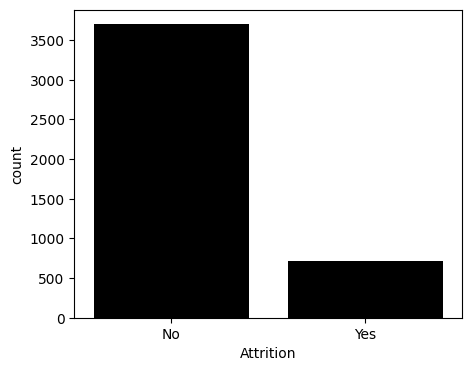

In [532]:
plt.figure(
    figsize=(5,4)
    )

sns.countplot(
    data=data_subset_cat,
    x=data_subset_cat["Attrition"],
    color="black"
    )

plt.show()

In [533]:
data_subset_cat["Education"].value_counts()

Education
Bachelor         1716
Master           1194
College           846
Below College     510
Doctor            144
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\2378113990.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Education', ylabel='count'>

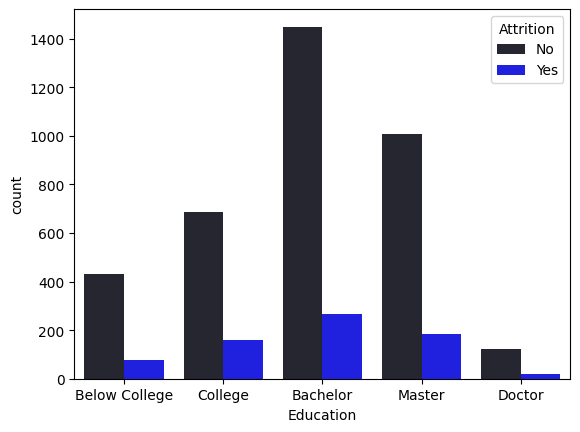

In [534]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["Education"],
    hue="Attrition",
    color="blue"
    )

> Op het eerste gezicht lijkt het dat de meeste werknemers bij de organisatie blijven

In [535]:
data_subset_cat["EducationField"].value_counts()

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\1910266588.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='EducationField', ylabel='count'>

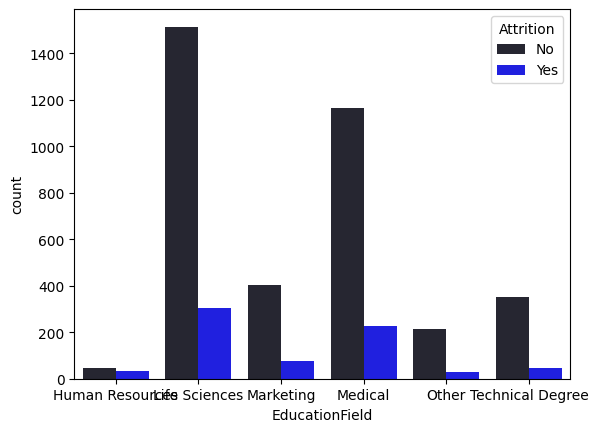

In [536]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["EducationField"],
    hue="Attrition",
    color="blue",
    )

>Verloop is het hoogst bij HR, maar heeft aanzienlijk minder werknemers

In [537]:
data_subset_cat["Gender"].value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\2991665758.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Gender', ylabel='count'>

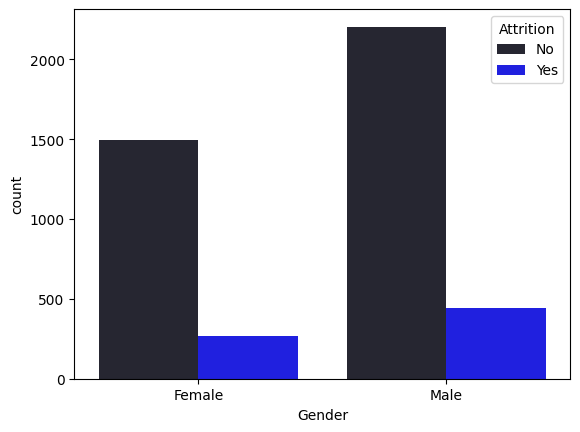

In [538]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["Gender"],
    hue="Attrition",
    color="blue"
    )

> Verloop onder mannen en vrouwen lijken gemiddeld hetzelfde; vrouwen wellicht iets meer ten opzichte van totale aantal vrouwen

In [539]:
data_subset_cat["Department"].value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\464845293.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='Department', ylabel='count'>

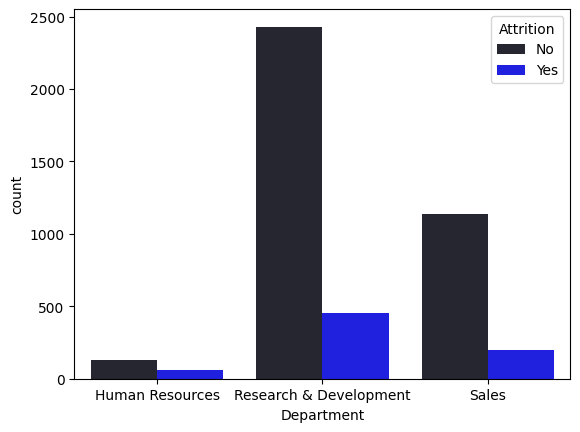

In [540]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["Department"],
    hue="Attrition",
    color="blue"
    )

In [541]:
data_subset_cat["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\979158441.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='BusinessTravel', ylabel='count'>

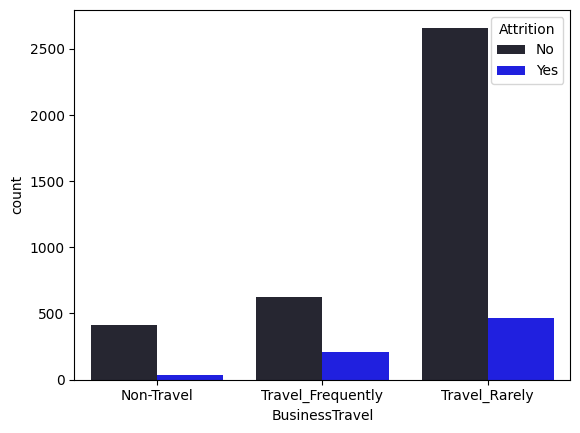

In [542]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["BusinessTravel"],
    hue="Attrition",
    color="blue"
    )

In [543]:
data_subset_cat["MaritalStatus"].value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\4226803025.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='MaritalStatus', ylabel='count'>

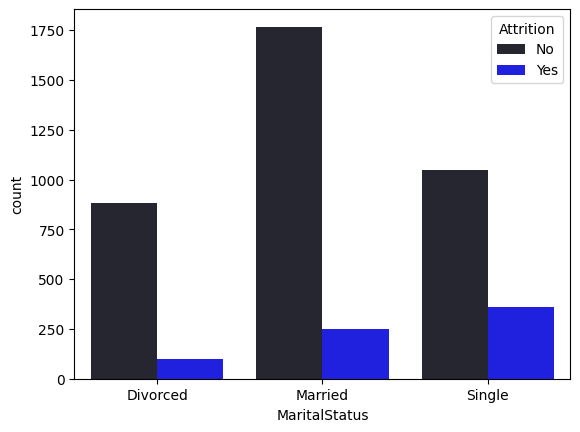

In [544]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["MaritalStatus"],
    hue="Attrition",
    color="blue"
    )

> Single mensen gaan sneller weg dan gescheiden/gehuwde mensen

In [545]:
data_subset_cat["JobLevel"].value_counts()

JobLevel
Entry       1629
Mid         1602
Senior       654
Manager      318
Director     207
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\426546320.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='JobLevel', ylabel='count'>

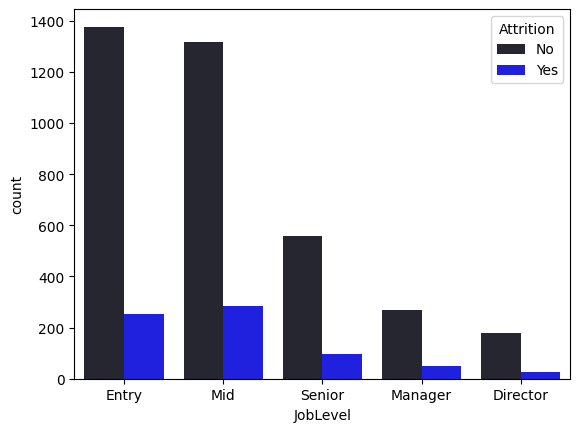

In [546]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["JobLevel"],
    hue="Attrition",
    color="blue"
    )

In [547]:
data_subset_cat["StockOptionLevel"].value_counts()

StockOptionLevel
Low          1893
Medium       1788
High          474
Very High     255
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\2977019651.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='StockOptionLevel', ylabel='count'>

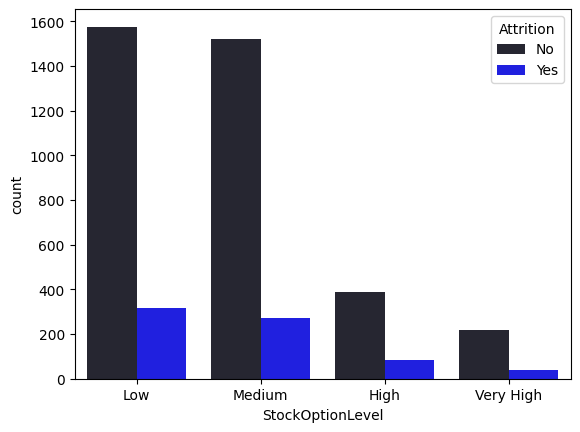

In [548]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["StockOptionLevel"],
    hue="Attrition",
    color="blue"
    )

In [549]:
data_subset_cat["StandardHours"].value_counts()

StandardHours
8    4410
Name: count, dtype: int64

> Iedereen werkt 8u, hebben daadwerkelijk werktijd een relatie met het verloop?

In [550]:
data_subset_cat["NumCompaniesWorked"].value_counts()

NumCompaniesWorked
1    1558
0     586
3     493
2     438
4     415
7     222
6     208
5     187
9     156
8     147
Name: count, dtype: Int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\1863064685.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

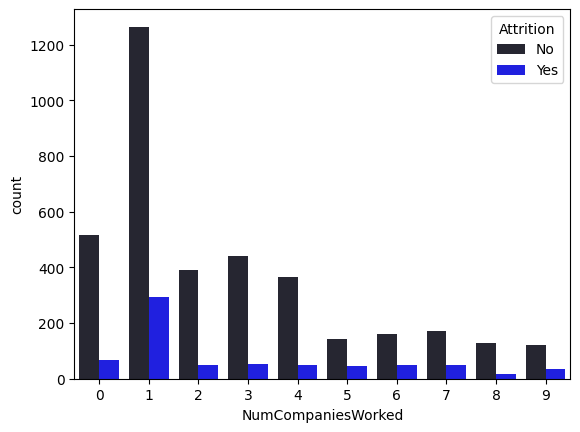

In [551]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["NumCompaniesWorked"],
    hue="Attrition",
    color="blue"
    )

> Het meeste verloop zit bij werknemers met weinig voorgaande werkgevers

In [552]:
data_subset_cat["TrainingTimesLastYear"].value_counts()

TrainingTimesLastYear
2    1641
3    1473
4     369
5     357
1     213
6     195
0     162
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\967304363.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

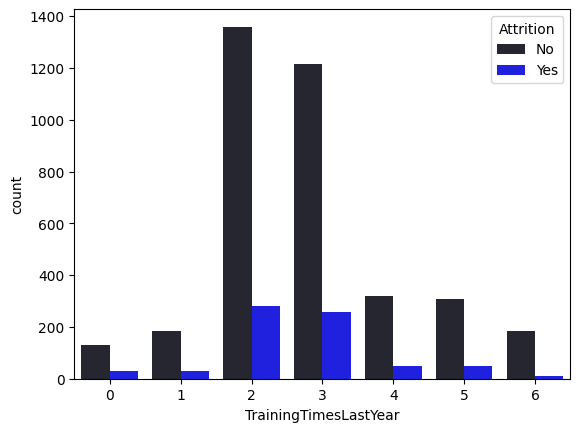

In [553]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["TrainingTimesLastYear"],
    hue="Attrition",
    color="blue"
    )

In [554]:
data_subset_cat["YearsWithCurrManager"].value_counts()

YearsWithCurrManager
2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
15      15
14      15
16       6
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\3750206361.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

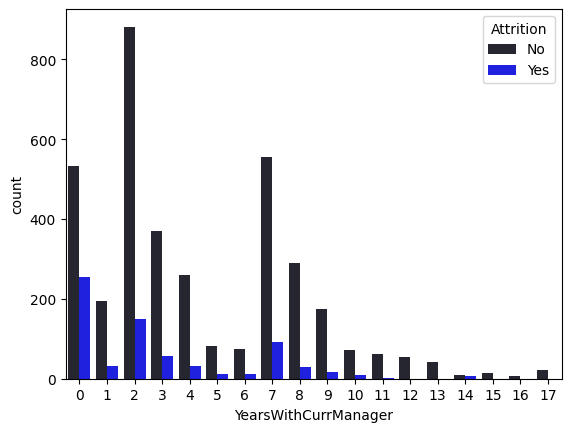

In [555]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["YearsWithCurrManager"],
    hue="Attrition",
    color="blue"
    )

> Het hoogste verloop ligt bij werknemers die minder dan een jaar bij hun manager zitten

In [556]:
data_subset_cat["YearsSinceLastPromotion"].value_counts()

YearsSinceLastPromotion
0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: count, dtype: int64

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_8500\1632214577.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(


<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

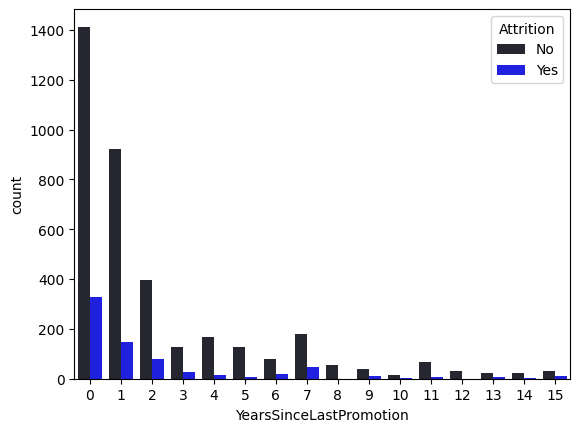

In [557]:
sns.countplot(
    data=data_subset_cat,
    x= data_subset_cat["YearsSinceLastPromotion"],
    hue="Attrition",
    color="blue"
    )

<Axes: xlabel='Age', ylabel='Count'>

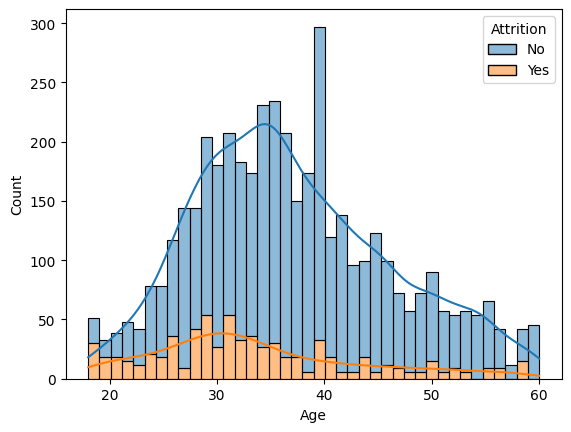

In [558]:
sns.histplot(
    data=data_subset_cat,
    x=data_subset_cat["Age"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

> Jongere werknemers gaan eerder weg dan oudere

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

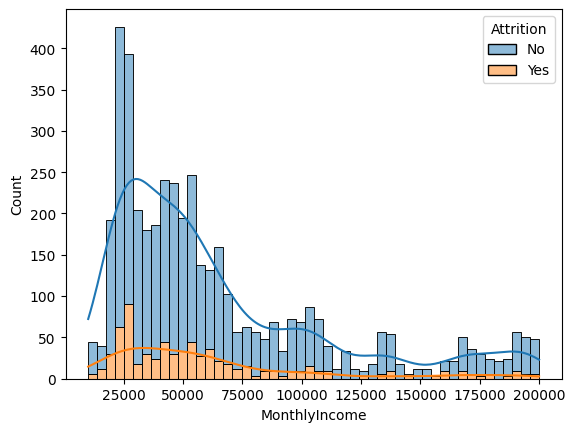

In [559]:
sns.histplot(
    data=data_subset_cat,
    x=data_subset_cat["MonthlyIncome"],
    hue="Attrition",
    kde=True,
    bins=50,
    multiple="stack"
    )

> Werknemers met laag inkomen gaan eerder weg en dit zijn ook de meeste werknemers in dienst

<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

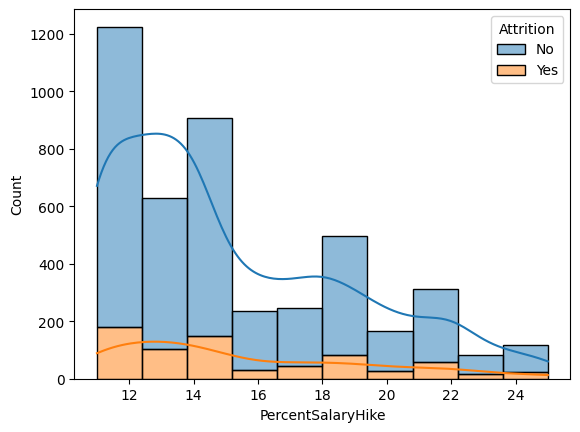

In [560]:
sns.histplot(
    data=data_subset_cat,
    x=data_subset_cat["PercentSalaryHike"],
    hue="Attrition",
    kde=True,
    bins=10,
    multiple="stack"
    )

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

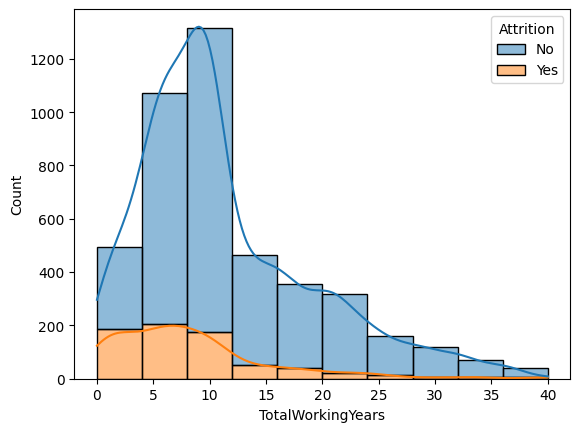

In [561]:
sns.histplot(
    data=data_subset_cat,
    x=data_subset_cat["TotalWorkingYears"],
    hue="Attrition",
    kde=True,
    bins=10,
    multiple="stack"
    )

> Werknemers met minst aantal werkjaren gaan eerder weg

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

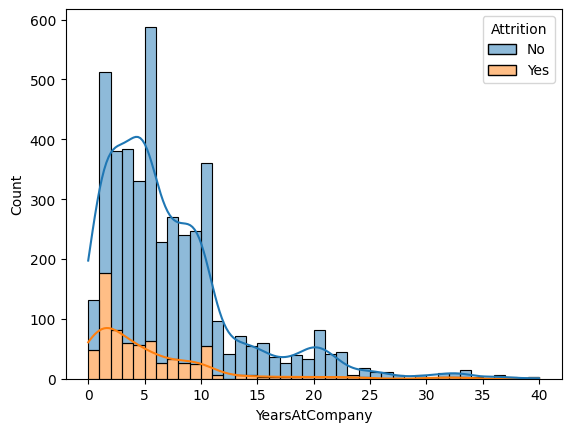

In [562]:
sns.histplot(
    data=data_subset_cat,
    x=data_subset_cat["YearsAtCompany"],
    hue="Attrition",
    kde=True,
    bins=40,
    multiple="stack"
    )

> De meeste werknemers gaan in hun eerste en tweede jaar weg

## Bivariate Analysis

### LabelEncoder voor de categorische kolommen

In [563]:
LE = LabelEncoder()

# Selecteer alle categorische kolommen in nummerieke subset
cat_columns = data_subset_num.select_dtypes(include='object').columns

# Loop over de categorische kolommen
for column in cat_columns:
    
    # Pas de LabelEncoder toe op de kolom
    data_subset_num[column] = LE.fit_transform(data_subset_num[column])

### Heatmap voor correlatie

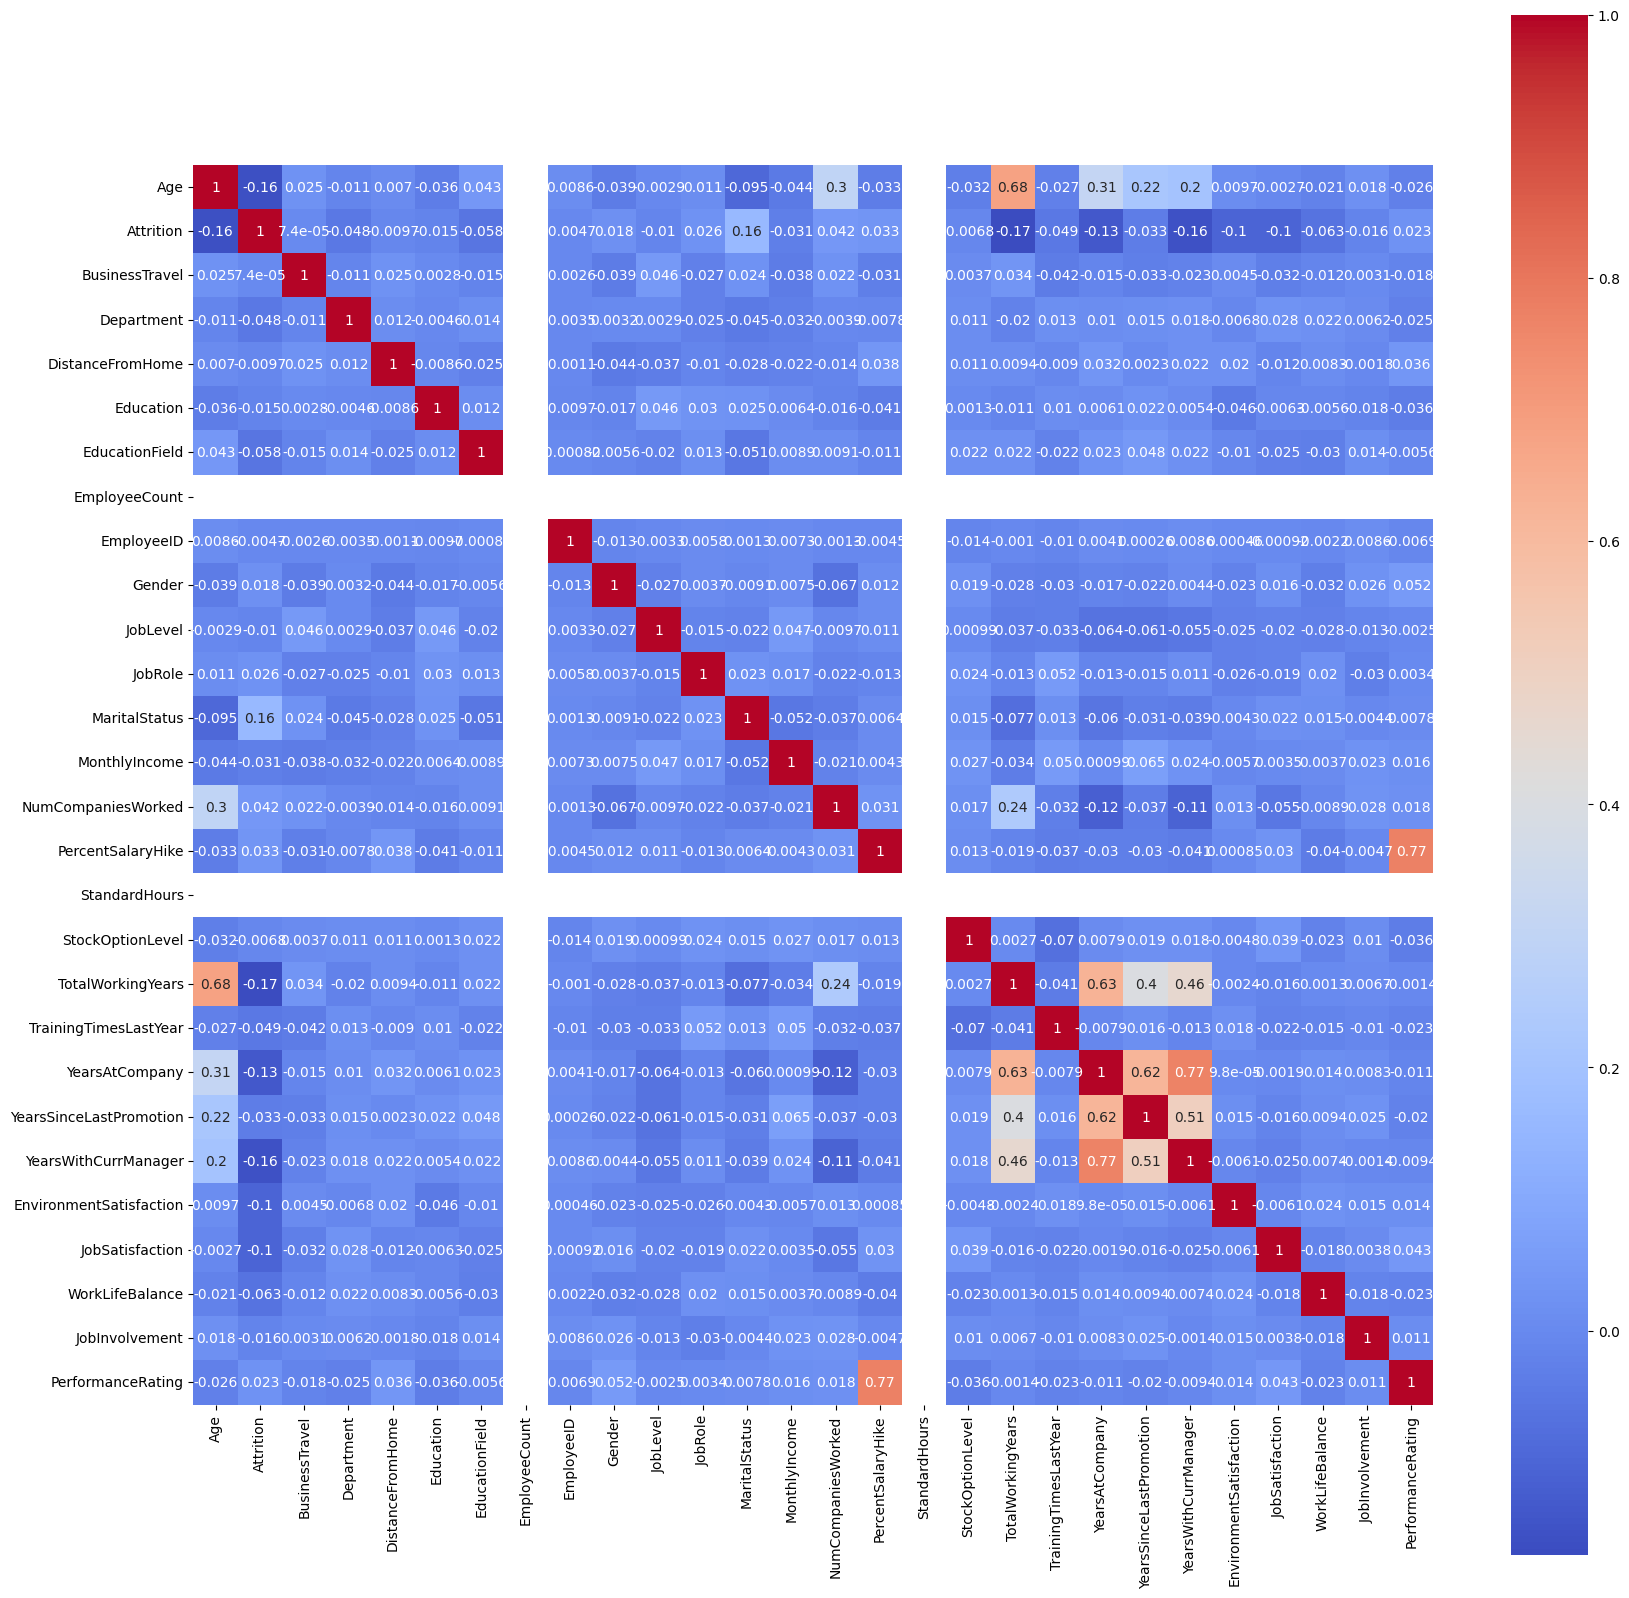

In [564]:
# Correlatie matrix
corr = data_subset_num.corr()

# Plot de correlatie matrix
plt.figure(
    figsize=(20, 20)
    )

# Plot de heatmap
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    square=True
    )

plt.show()

### Clean subset maken

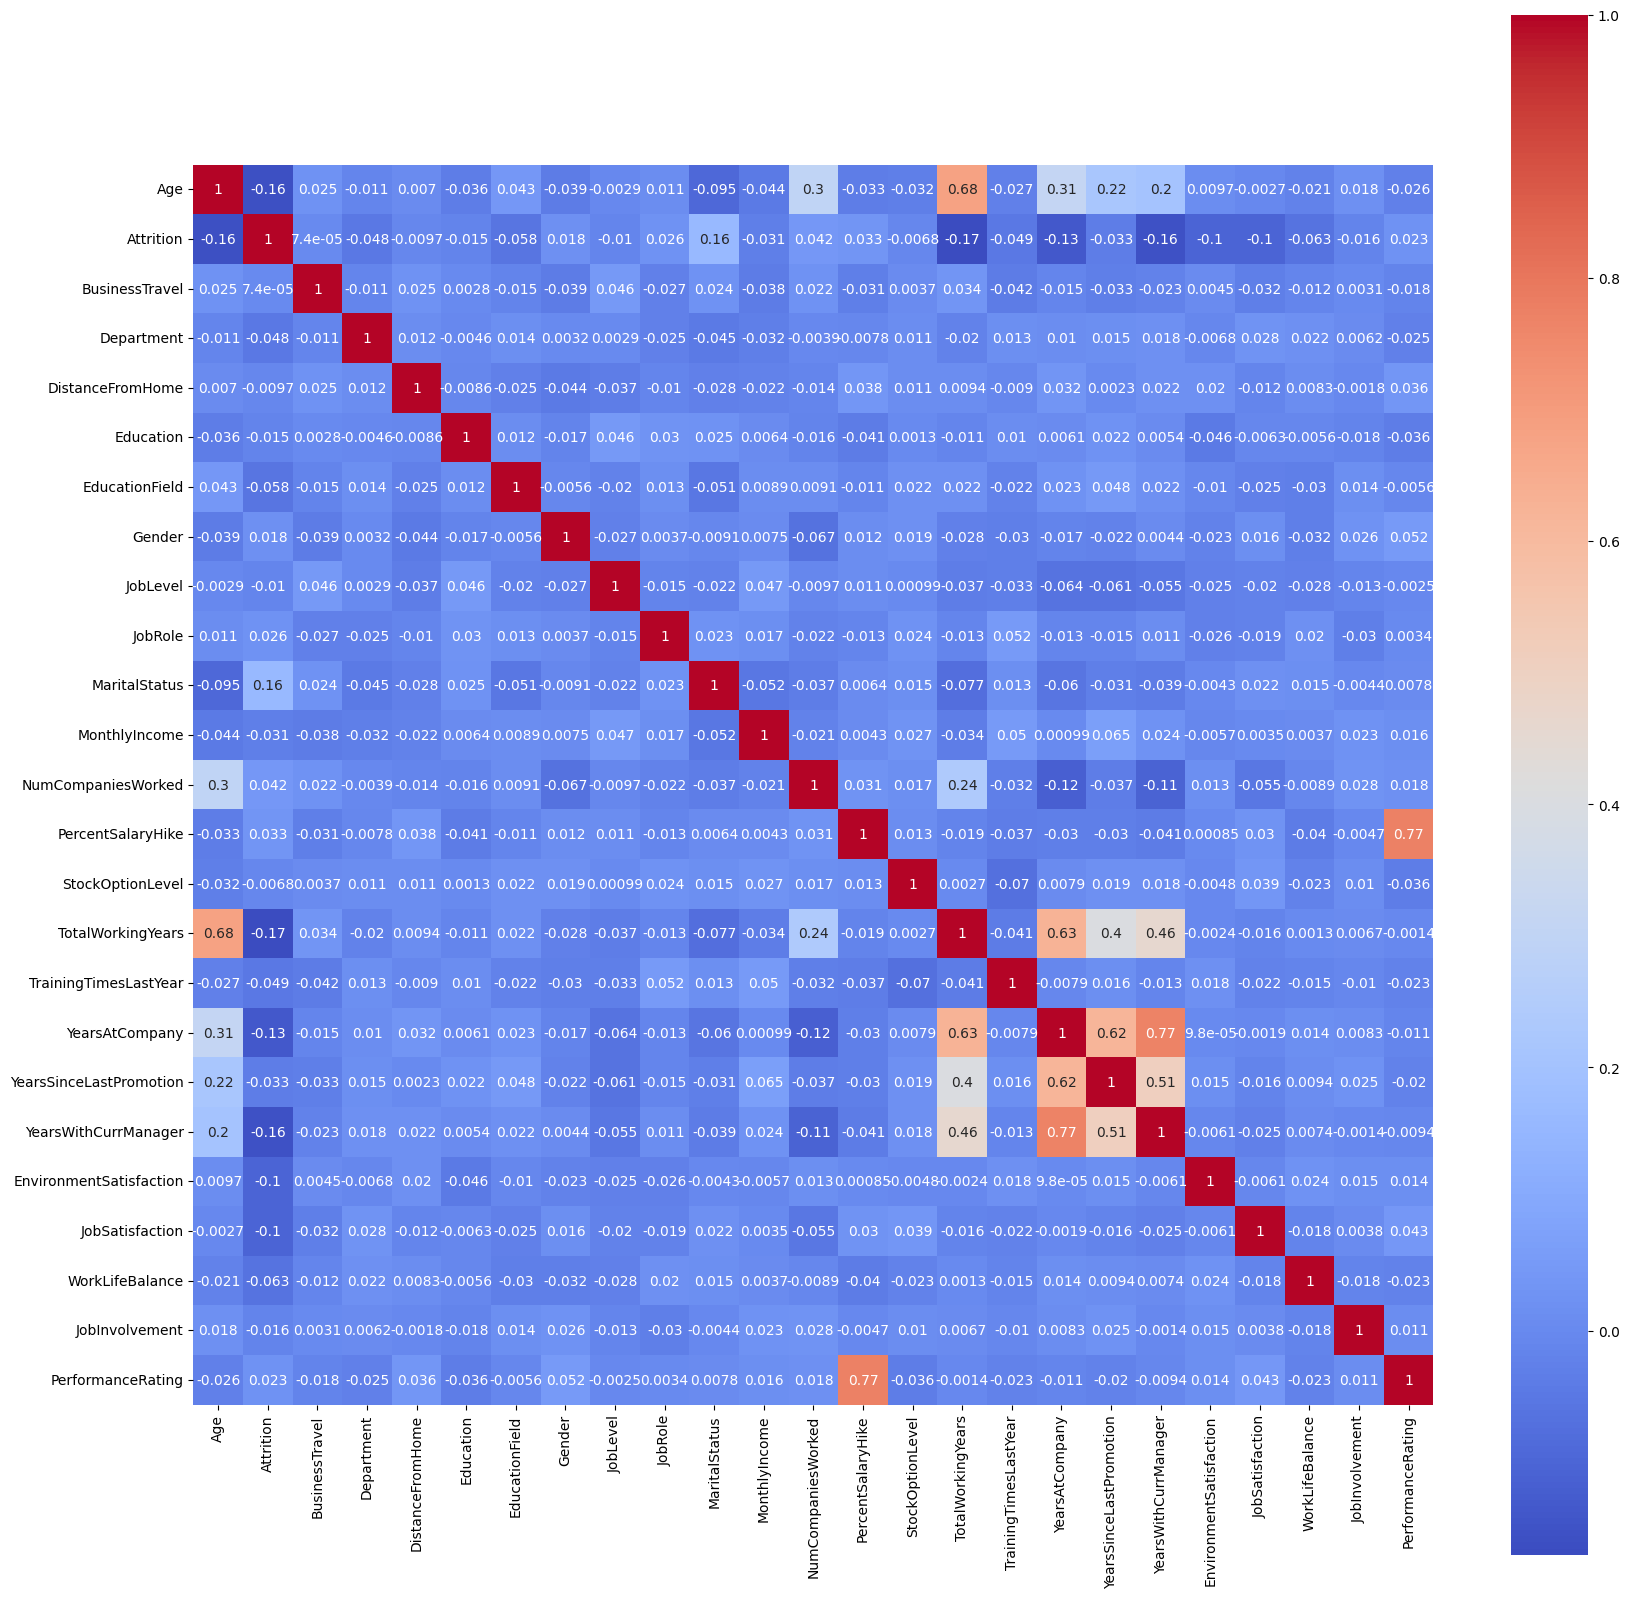

In [565]:
# Verwijder de kolommen EmployeeID, StandardHours en EmployeeCount
data_clean_heatmap = data_subset_num.drop(
    columns=[
        'EmployeeID',
        'StandardHours',
        'EmployeeCount'
        ]
    )

# Nieuwe correlatie matrix
corr_clean = data_clean_heatmap.corr()

# Plot de nieuwe correlatie matrix
plt.figure(
    figsize=(20, 20)
    )

# Plot de heatmap
sns.heatmap(
    corr_clean,
    annot=True,
    cmap='coolwarm',
    square=True
    )

plt.show()

> Attrition heeft een correlatie met MaritalStatus met een waarde van 0.16

1. TotalWorkingYears heeft een correlatie met Age en NumCompaniesWorked met een waarde van 0.68 en 0.24 respectievelijk
2. YearsAtCompany heeft een correlatie met Age en TotalWorkingYears met een waarde van 0.31 en 0.63 respectievelijk
3. YearsSinceLastPromotion heeft een correlatie met Age en TotalWorkingYears met een waarde van 0.22 en 0.4 respectievelijk
4. YearsWithCurrManager heeft een correlatie met Age, TotalWorkingYears, YearsAtCompany en YearsSinceLastPromotion met een waarde van 0.2, 0.46, 0.77 en 0.51 respectievelijk
5. PerformanceRating heeft een correlatie met PercentSalaryHike met een waarde van 0.77

> De meest gecorreleerde variabelen zijn:

1. TotalWorkingYear en Age: 0.68
2. YearsAtCompany en TotalWorkingYears: 0.63
3. YearsSinceLastPromotion en YearsAtCompany: 0.62
4. YearsWithCurrManager en YearsAtCompany: 0.77
5. PerformanceRating en PercentSalaryHike: 0.77

## Train en Test split maken van data_subset_num

In [566]:
# Definieer de features en target
X = data_subset_num.drop('Attrition', axis=1)
y = data_subset_num['Attrition']

# Split de dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y
    )

# Omvang
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3087, 27), (1323, 27), (3087,), (1323,))

## SMOTE BALANCE?